<a href="https://colab.research.google.com/github/DiannanWei/UTS_ML2019_ID12998872/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Practical Machine Learning Project
Group member:<br>12498996&nbsp;&nbsp;Xiyuan Guo<br>12998872&nbsp;&nbsp;Diannan Wei

## Introduction
The house price usually highly affects the economy of the county. As the house price rising, the economic generally growth higher because of the encouraged consumer starts to spend more money. If the house prices start to drop down, the consumer’s confidence and construction will be negatively affected, then the economic start to grow slowly (Pettinger, 2019). The changing of the house price could even change the distribution of wealth in the economy of houseowner and the living quality of people who do not own a house. The problem is the house price is not controlled by a single person, and there is no way that we could simply change the house price.
Although we could not change the trends of the house price, but we could follow the trends to reduce the risk and enjoy the benefit as buyers or sellers. The house price will generally be affected by multiple factors, such as location, the number of bedrooms, the number of bathrooms and the size of the house in total. The house price is predictable if there is enough information and reliable prediction algorithm. In this practical project, we will try to predict the house price by using the dataset of house sales in King County USA. 

## Exploration
### Challenge and Data Structures
The challenge we are facing is the uncertain affecting factors of the dataset and get high correct prediction rate. The dataset records the house price information of King County from May 2014 to May 2015, with a total of 21,613 rows and 21 columns, including 19 house characteristics and price as well as id. The detailed information of each feature is shown in Table 1. It is hard to determine the most influencing characteristics from the whole dataset.
The dataset is from Kaggle and it presents the dataset in the CSV data format, which is similar to an excel table. We decided to use 2-dimensional labelled data structure in the data model. This data structure has a similar structure to our data source and is often used in machine learning data models. We will use the linear regression model as our preferred data model. This model can be used to determine the inter-dependent quantitative relationship between two or more variables, and it can accurately describe the future change trend. We will analyse the correlation between all 19 house features and house price, and randomly divide all the data into training set and test set for modelling and test.

![alt text](http://com88.com/ML_A2/Table1.PNG)




<br>
<br>
<br>

## Methodology
We are going to use Python on Google Colab for the implementation of the project. We first load the datasets from our GitHub and then import pandas library to help us in data processing. Then, we are going to look at some basial information about the dataset which is important for the following steps.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DiannanWei/UTS_ML2019_ID12998872/master/A2_dataset.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<center>Figure 1<center!>

According to the Figure 1, we can know that each column of data has 21613 rows, and there was no data missing been found on any feature of this dataset. We then imported the seaborn library which is used for making statistical graphics. We selected several house features and plotted the distribution of the data.

In [0]:
import seaborn as sns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built']
sns.pairplot(data[features],height=1.5)

![alt text](http://com88.com/ML_A2/Figure2.PNG)

<br>
<br>
<br>
<br>
<br>

<center>Figure 2</center>

The Figure 2 presents the distribution of selected data. These house features and the price are not very linearly related and there is little abnormal value. Therefore, we need to investigate the degree of correlation between each house feature and the house price accurately. We are going to draw the heatmap of each house feature and house price using seaborn library. Before that, we need to convert the feature of house selling date into pure numeric data since it is the combination of number and letters, which cannot be directly used. It will be done by the code down below.

In [4]:
data = data.drop(['id'],axis=1)
data['date']=data['date'].map(lambda x:x.replace('T',''))
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


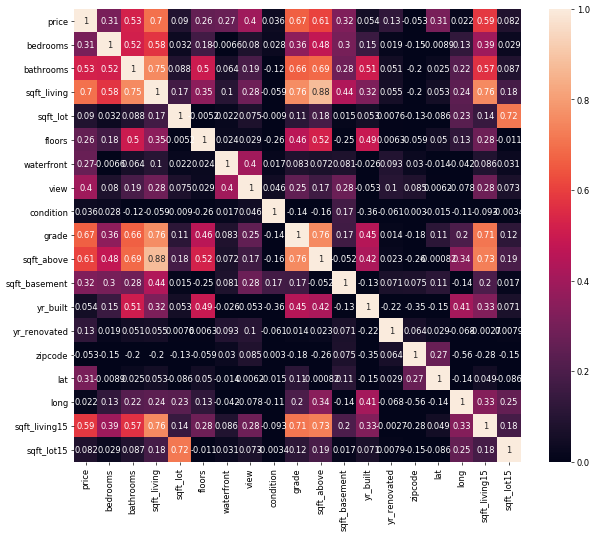

In [5]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(12,10),dpi=60)
sns.heatmap(data.corr(),annot =True,vmin = 0, vmax = 1)

<center>Figure 3</center>

The degree of linear correlation between house features and house price can be known more accurately from the heatmap. The number in the figure is the Pearson correlation coefficient. The large value of the correlation coefficient indicates the large degree of linear correlation between the two variables. Additionally, it can also be determined by the depth of the color. As shown in Figure 3, the square footage of the home and the number of bathrooms have a high linear correlation with the house price, while the linear correlation between the construction year, postcode and house price is very low. These are reasonable and the dataset can be used to build and train the model. There was one more thing we need to do, that is remove ‘id’ from the data because it should not be a feature that affects houss price. 

Since the linear regression data model is adopted, we first need to standardize the data and separate the feature and target values for training the model and then import the new sklearn library to implement our linear regression model. We randomly divided the data model into two parts. The data as training set accounted for 70%, and the remaining 30% is used as a test set to verify the accuracy of the trained model.

In [0]:
feature_data = data.drop(['price'],axis=1)
target_data = data['price']

from sklearn.preprocessing import StandardScaler
x_ss = StandardScaler()
feature_data = x_ss.fit_transform(feature_data)
target_data = x_ss.fit_transform(target_data.values.reshape(-1,1))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=37)

With the sklearn library, we quickly trained the data model with the training set.

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation

Now, we can get the prediction with the model we built.

In [8]:
y_predict = lin_reg.predict(x_test)
print (y_predict) 

[[-0.05921903]
 [-0.66276271]
 [-0.30073491]
 ...
 [ 0.23881872]
 [ 0.64292412]
 [ 1.63230401]]


After that, we need to evaluate the result of prediction. R^2 is coefficient of determination which is used to evaluate the goodness of fit for the linear regression model. Its maximum value is 1 which represents the best fitting degree of the data model.


We calculate R^2 to evaluate the accuracy of the results.


![alt text](http://com88.com/ML_A2/Rsquare.png)

In [9]:
print (lin_reg.score(x_test, y_test))

0.7135001957462601


From the result, we can know that the fitting degree of the current data model is 71.35% that means the linear regression model can accurately predict around 70 percent house price.

Although the current linear regression model has a good result, we want to know whether other methods can achieve higher accuracy. We will try another method SVM (Support Vector Machine) which is a linear model for classification and regression problems. 

We can build model using training set and test set from the last model directly. By importing relevant libraries, we quickly trained the model and obtained the evaluation results of the model.

In [10]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
linear_svr = SVR(kernel="linear")
linear_svr.fit(x_train, y_train)
linear_svr_y_predict = linear_svr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(linear_svr.score(x_test, y_test))

0.6676371713941748


![alt text](http://com88.com/ML_A2/Table2.PNG)

From the results of the SVM model, we can know that the accuracy of this model is a little lower than that of the previous linear regression model as shown in Table 2. 

In addition, we measured the training time of the two models. In our case that the dataset is not large and there are 18 features involved in the calculation, the statistical results show that the running time required by SVM is much longer than that required by the linear regression model and the efficiency of SVM is lower than linear regression.

## Ethical

As mentioned in earlier section, there are many stakeholders that related to the prediction of house price. The direct stakeholders are sellers, buyers, current houseowner and who do not own a house. To discuss the potential ethical issue for the using of house price prediction, the utilitarian ethical model will be adopted.
To process the utilitarian approach, the major method is to identify the stakeholders’ benefit after house price prediction accurate and the possible harm may cause by the accurate prediction. After the house price could be accurate predict, the seller could easily target the suitable sale point to sell the house, the buyer could buy the favourite house when the price gets low. Both seller and buyer will not be cheated by the temporary Price fluctuation. The current houseowner and people who do not own a house could use the prediction as the consideration aspect to design their future selling or saving plan. On the other hand, the possibility of harm is also existing. Once the prediction become accurate, the current houseowner will have more initiative than people who do not own a house. People might need to sacrifice extra life quality to get their first house, and the current houseowner might become more and more wealthy because of accurate house price prediction. Overall, the benefit to all the stakeholders are more weighted than the possible harm to the stakeholders. That is because not only current sellers and buyers could get the benefit, but also could provide the positive influence on helping the people for future plan. The harm as the negative side can only become true if the only influencing element of economic is the house price, which could cause the wealth distribution is only rely on the changing of house price.

## Conclusion

During the processing, the most difficult parts are analysing the relationship between each house feature and the house price, and the selection of features. The relationship and relevant degree cannot be directly observed by only look through the data or the analysis from the distribution chart. We end with the using of heatmap and correlation coefficient to identify the relevant degree.
In this project, we processed two algorithms to compare and study the difference of efficiency and the accuracy, which are linear regression and SVM. There also are several pre-processing methods can be applied. The most famous and commonly used two methods are normalisation and standardisation. The normalisation method is to convert the data value into the common scale, that use zero as the average and one as the standard deviation.  The standardisation is to convert the data into the common format to investigate. For the further improvement, how normalisation and standardisation could affect the accuracy of prediction will be studied.


## Reference
Pettinger, T. 2019, How the housing market affects the economy, Economicshelp, viewed 18 September 2019, \<https://www.economicshelp.org/blog/21636/housing/how-the-housing-market-affects-the-economy>.

Park, B., & Bae, J. K. (2015). Using machine learning algorithms for housing price prediction: The case of Fairfax County, Virginia housing data. Expert Systems with Applications,42(6), 2928-2934. 2014.11.040 

<br>

###[Github Repository Link](https://github.com/DiannanWei/UTS_ML2019_ID12998872)